In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import re
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Load the data


In [3]:
import pandas as pd
import numpy as np
# Import Regular Expression
import re
# Loading the data
df = pd.read_csv("Data\jumia_phones.csv")
# Display the first few rows of the data to get a sense of the data structure
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [4]:
print("df shape:",df.shape)
print ("------------------------------------------------")
print("df missing values",df.isna().sum())
print ("------------------------------------------------")
print("df missing values",df.isna().sum())

df shape: (12000, 7)
------------------------------------------------
df missing values Name                    0
Price                   0
Old Price            3899
Discount             3899
Rating                300
Number of Reviews     300
Search Ranking          0
dtype: int64
------------------------------------------------
df missing values Name                    0
Price                   0
Old Price            3899
Discount             3899
Rating                300
Number of Reviews     300
Search Ranking          0
dtype: int64


In [5]:
#check for duplicates in df
print(df.duplicated().sum())

0


## FEATURE EXTRACTION

In [6]:
#duplicate the name column

df['Name_duplicate'] = df['Name']
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Name_duplicate
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1","XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S..."
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2","Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ..."
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3","Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (..."
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4","Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ..."
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5","Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (..."


In [7]:
import json

# Convert DataFrame to JSON string in list format
json_string = df.to_json(orient="records")

# Parse the JSON string to a list of dictionaries
json_list = json.loads(json_string)

# Display the first 5 records as a list
print(json_list[:5])



[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)', 'Price': 'KSh 11,000', 'Old Price': None, 'Discount': None, 'Rating': '4.1 out of 5', 'Number of Reviews': '4.1 out of 5(220)', 'Search Ranking': 'Page 1, Rank 1', 'Name_duplicate': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)'}, {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)', 'Price': 'KSh 12,925', 'Old Price': 'KSh 15,000', 'Discount': '14%', 'Rating': '4.4 out of 5', 'Number of Reviews': '4.4 out of 5(135)', 'Search Ranking': 'Page 1, Rank 2', 'Name_duplicate': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)'}, {'Name': 'Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (Dual SIM), 4G, 5000mAh - Mystery White (1YR WRTY)', 'Price': 'KSh 10,000', 'Old Price': None, 'Discount': None, 'Rating': '4.2 out of 5', 'Number of Rev

In [8]:
# Get the name entries in the name column and assign them to a list called data
#select the two name columns
data = json_list

# convert the data type of data to a list

# Check the data type of data
type(data)
data[:5]

[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)',
  'Price': 'KSh 11,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.1 out of 5',
  'Number of Reviews': '4.1 out of 5(220)',
  'Search Ranking': 'Page 1, Rank 1',
  'Name_duplicate': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)'},
 {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)',
  'Price': 'KSh 12,925',
  'Old Price': 'KSh 15,000',
  'Discount': '14%',
  'Rating': '4.4 out of 5',
  'Number of Reviews': '4.4 out of 5(135)',
  'Search Ranking': 'Page 1, Rank 2',
  'Name_duplicate': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)'},
 {'Name': 'Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (Dual SIM), 4G, 5000mAh - Mystery White (1YR WRTY)',
  'Price': 'KSh 10,000',
  'Old Price': None,
  'Discount': None,
  'R

In [9]:
#create a list of dictionaries containing name and name 2

# name_list = [{'name': name,'name_duplicate':name_duplicate} for name, name_duplicate in zip(data['Name'], data['Name_duplicate'])]

# name_list

In [10]:
#clean the first entry in the list
# Define function to clean 'name_duplicate'
def clean_name_duplicate(name_duplicate):
    # Remove unwanted characters, keeping numbers and spaces
    cleaned = re.sub(r"[,'+\-]", " ", name_duplicate)  # Replace commas, single quotes, and plus signs with space
    cleaned = re.sub(r"\s+", " ", cleaned).strip()  # Replace multiple spaces with a single space
    return cleaned
# Apply the cleaning function to 'name_duplicate' for each dictionary in the list
for entry in data:
    entry['Name_duplicate'] = clean_name_duplicate(entry['Name_duplicate'])

# Output the cleaned data

data[0:5]

    

[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)',
  'Price': 'KSh 11,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.1 out of 5',
  'Number of Reviews': '4.1 out of 5(220)',
  'Search Ranking': 'Page 1, Rank 1',
  'Name_duplicate': 'XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) 5000mAh Midnight Black (2 YRs WRTY)'},
 {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)',
  'Price': 'KSh 12,925',
  'Old Price': 'KSh 15,000',
  'Discount': '14%',
  'Rating': '4.4 out of 5',
  'Number of Reviews': '4.4 out of 5(135)',
  'Search Ranking': 'Page 1, Rank 2',
  'Name_duplicate': 'Tecno Spark 20 Android 13 6.6" 128GB 4GB RAM(4GB Extended) 50MP 5000mAh Gravity Black(1YR WRTY)'},
 {'Name': 'Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (Dual SIM), 4G, 5000mAh - Mystery White (1YR WRTY)',
  'Price': 'KSh 10,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.2 ou

In [11]:
# shamlas

# def clean_data(data):
#     cleaned_data = []
    
#     for entry in data:
#         # Remove unwanted characters, keeping numbers and spaces
#         cleaned_entry = re.sub(r"[,'+\-]", " ", entry)  # Replace commas, single quotes, and plus signs with space
#         cleaned_entry = re.sub(r"\s+", " ", cleaned_entry)  # Replace multiple spaces with a single space
#         cleaned_entry = cleaned_entry.strip()  # Remove leading and trailing spaces
#         cleaned_data.append(cleaned_entry)
    
#     return cleaned_data

# # Clean the data
# cleaned_data = clean_data(data)

# cleaned_data

In [12]:
#separate sumsung entries from other entries in the name list by checking "name_duplicate"
samsung_phones=[]
other_phones=[]

for entry in data:
    if "Samsung" in entry['Name_duplicate']:
        samsung_phones.append(entry)
    else:
        other_phones.append(entry)

samsung_phones, other_phones   

# # Get the length of the cleaned data
print(len(samsung_phones), len(other_phones))  # 3 and 3 respectivelysamsung_phones_data_length = len(samsung_phones)



2700 9300


In [13]:
# #shamlas
# # Separate Samsung entries from other brands
# samsung_phones = [spec for spec in data if "Samsung" in spec]
# other_phones = [spec for spec in data if "Samsung" not in spec]

# # Let us check the result
# samsung_phones, other_phones

In [14]:
# #shamlas
# # Feature extraction from the samsung phones using regular expressions
# def extract_samsung_info(spec):
#     # Regular expressions for extracting relevant parts
#     name_pattern = r'^(Samsung\s+Galaxy\s+\w+\s*\w*)'  # Without the case-insensitivity flag
#     display_pattern = r'(\d+(\.\d+)?)\s*["\']'
#     ram_pattern = r'(\d+)GB RAM'
#     storage_pattern = r'(\d+GB)\s*ROM'
#     camera_pattern = r'(\d+MP)'
#     battery_pattern = r'(\d{4}mAh)'
#     sim_pattern = r'\(?(Dual\s+Sim|DUAL\s+SIM|Single\s+Sim|Single)\)?'
    
#     # Extract all the numbers that are followed by GB
#     gb_values = [int(m.group(1)) for m in re.finditer(r'(\d+)GB', spec)]

#     # Determine RAM and Storage based on size
#     ram = min(gb_values) if gb_values else None
#     storage = max(gb_values) if gb_values else None

#     # Updated color pattern to ensure it captures correctly
#     color_pattern = r'(?i)[-\s](Black|White|Blue|Red|Green|Yellow|Gold|Silver|Gray|Pink)(?=\s|\(|$)'
#     color_match = re.search(color_pattern, spec)
#     color = color_match.group(1).strip() if color_match else None

#     # Set a default display size if not found
#     display_size = re.search(display_pattern, spec).group(1) if re.search(display_pattern, spec) else "6.0"

#     # Use case-insensitive search for name
#     name_match = re.search(name_pattern, spec, re.IGNORECASE)
    
#     return {
#         "Name": name_match.group(0).strip() if name_match else None,
#         "Display Size": display_size,
#         "RAM": ram,
#         "Storage": storage,
#         "Camera": re.search(camera_pattern, spec).group(1) if re.search(camera_pattern, spec) else None,
#         "Battery": re.search(battery_pattern, spec).group(1) if re.search(battery_pattern, spec) else None,
#         "Color": color,
#         "Warranty": "Yes" if "WRTY" in spec else "No",
#         "Number of SIMs": 2 if re.search(sim_pattern, spec) and "Dual" in re.search(sim_pattern, spec).group(0) else 1
#     }

# # Extract information for Samsung phones

# samsung_phones_data = [extract_samsung_info(spec) for spec in samsung_phones,entry["name_duplicate"] ]

# # Create a DataFrame
# samsung_phones_df = pd.DataFrame(samsung_phones_data)

# # Display the DataFrame
# print("Samsung Phones:")
# samsung_phones_df.head(10)

In [15]:

# Feature extraction from the samsung phones using regular expressions
def extract_samsung_info(spec):
    # Regular expressions for extracting relevant parts
    name_pattern = r'^(Samsung\s+Galaxy\s+\w+\s*\w*)'
    display_pattern = r'(\d+(\.\d+)?)\s*["\']'
    ram_pattern = r'(\d+)GB RAM'
    storage_pattern = r'(\d+GB)\s*ROM'
    camera_pattern = r'(\d+MP)'
    battery_pattern = r'(\d{4}mAh)'
    sim_pattern = r'\(?(Dual\s+Sim|DUAL\s+SIM|Single\s+Sim|Single)\)?'
    
    # Extract all the numbers that are followed by GB
    gb_values = [int(m.group(1)) for m in re.finditer(r'(\d+)GB', spec)]

    # Determine RAM and Storage based on size
    ram = min(gb_values) if gb_values else None
    storage = max(gb_values) if gb_values else None

    # Updated color pattern to ensure it captures correctly
    color_pattern = r'(?i)[-\s](Black|White|Blue|Red|Green|Yellow|Gold|Silver|Gray|Pink)(?=\s|\(|$)'
    color_match = re.search(color_pattern, spec)
    color = color_match.group(1).strip() if color_match else None

    # Set a default display size if not found
    display_size = re.search(display_pattern, spec).group(1) if re.search(display_pattern, spec) else "6.0"

    # Use case-insensitive search for name
    name_match = re.search(name_pattern, spec, re.IGNORECASE)
    
    return {
        "Phone_Name": name_match.group(0).strip() if name_match else None,
        "Display Size": display_size,
        "RAM": ram,
        "Storage": storage,
        "Camera": re.search(camera_pattern, spec).group(1) if re.search(camera_pattern, spec) else None,
        "Battery": re.search(battery_pattern, spec).group(1) if re.search(battery_pattern, spec) else None,
        "Color": color,
        "Warranty": "Yes" if "WRTY" in spec else "No",
        "Number of SIMs": 2 if re.search(sim_pattern, spec) and "Dual" in re.search(sim_pattern, spec).group(0) else 1
    }

# Sample data for samsung_phones
# samsung_phones = [
#     {'name': 'Samsung Galaxy A14, 6.6", 4GB RAM + 64GB (Dual SIM), 5000mAh, Black (1 YR WRTY)',
#      'name_duplicate': 'Samsung Galaxy A14, 6.6", 4GB RAM + 64GB (Dual SIM), 5000mAh, Black (1 YR WRTY)'},
#     {'name': 'Samsung Galaxy S22, 6.1", 8GB RAM - 128GB (Single SIM), 3700mAh, Phantom Black',
#      'name_duplicate': 'Samsung Galaxy S22, 6.1", 8GB RAM - 128GB (Single SIM), 3700mAh, Phantom Black'}
# ]

# Extract information for Samsung phones and expand the dictionaries
for entry in samsung_phones:
    # Extract info using name_duplicate
    extracted_info = extract_samsung_info(entry["Name_duplicate"])
    # Update the existing entry with the extracted information
    entry.update(extracted_info)

# Create a DataFrame
samsung_phones_df = pd.DataFrame(samsung_phones)

# Display the DataFrame
print("Samsung Phones:")
print(samsung_phones_df.head())
print(samsung_phones_df.shape)
print(type(samsung_phones_df))

Samsung Phones:
                                                Name       Price   Old Price  \
0  Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...  KSh 14,000        None   
1  Samsung GALAXY A15, 6.5'' HD+, 4GB RAM + 128GB...  KSh 17,445  KSh 29,999   
2  Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...  KSh 13,899  KSh 22,999   
3  Samsung Galaxy A15, 6.5'' Display, 4GB RAM + 1...  KSh 17,445  KSh 29,999   
4  Samsung Galaxy A05s, 6.7", 64GB + 4GB (Dual SI...  KSh 13,599  KSh 13,999   

  Discount        Rating  Number of Reviews   Search Ranking  \
0     None  4.5 out of 5   4.5 out of 5(29)   Page 1, Rank 4   
1      42%  4.2 out of 5  4.2 out of 5(420)   Page 1, Rank 6   
2      40%  3.9 out of 5  3.9 out of 5(116)   Page 1, Rank 7   
3      42%  4.3 out of 5  4.3 out of 5(233)  Page 1, Rank 13   
4       3%  4.6 out of 5   4.6 out of 5(26)  Page 1, Rank 14   

                                      Name_duplicate             Phone_Name  \
0  Samsung Galaxy A05 6.7 4GB RAM 128GB

In [16]:
# #shamlas
# # Cleaning up other phones
# def clean_entries(entries):
#     cleaned_entries = []
#     for entry in entries:
#         # Remove mathematical operators
#         cleaned_entry = re.sub(r'[+\-]', '', entry)
#         cleaned_entries.append(cleaned_entry)
#     return cleaned_entries

# # Clean the list
# other_phones = clean_entries(other_phones)

# other_phones

In [17]:
import re

# Further cleaning to remove mathematical operators within the other phones list
def clean_entries(entries):
    cleaned_entries = []
    for entry in entries:
        # Make a copy of the entry to avoid modifying the original
        cleaned_entry = entry.copy()
        
        # Remove mathematical operators from 'name_duplicate'
        cleaned_entry['name_duplicate'] = re.sub(r'[+\-]', '', entry["Name_duplicate"])
        
        # Append the entire cleaned dictionary to the list
        cleaned_entries.append(cleaned_entry)
    
    return cleaned_entries

# Clean the samsung_phones list
other_phones = clean_entries(other_phones)

# Display the cleaned Samsung phone specifications
other_phones


[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)',
  'Price': 'KSh 11,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.1 out of 5',
  'Number of Reviews': '4.1 out of 5(220)',
  'Search Ranking': 'Page 1, Rank 1',
  'Name_duplicate': 'XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) 5000mAh Midnight Black (2 YRs WRTY)',
  'name_duplicate': 'XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) 5000mAh Midnight Black (2 YRs WRTY)'},
 {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)',
  'Price': 'KSh 12,925',
  'Old Price': 'KSh 15,000',
  'Discount': '14%',
  'Rating': '4.4 out of 5',
  'Number of Reviews': '4.4 out of 5(135)',
  'Search Ranking': 'Page 1, Rank 2',
  'Name_duplicate': 'Tecno Spark 20 Android 13 6.6" 128GB 4GB RAM(4GB Extended) 50MP 5000mAh Gravity Black(1YR WRTY)',
  'name_duplicate': 'Tecno Spark 20 Android 13 6.6" 128GB 4GB RAM(4GB Extended) 50MP 5000m

In [18]:
# #shamlas
# # Feature extraction from the list of other phones
# def extract_other_phones_info(spec):
#     # Regular expressions for extracting relevant parts
#     name_pattern = r'^(XIAOMI|Tecno|Infinix|Itel|Oale)\s+(\w+\s*\w*)'
#     display_pattern = r'(\d+(\.\d+)?)\s*["\']'
#     ram_pattern = r'(\d+)GB\s*RAM'
#     storage_pattern = r'(\d+GB|(\d+MB))\s*(ROM|Storage)'
#     camera_pattern = r'(\d+MP)'
#     battery_pattern = r'(\d{4}mAh|\d{4}MAh)'
#     sim_pattern = r'\(?(Dual\s+SIM|Single\s+SIM|Single)\)?'
    
#     # Extract RAM and Storage
#     gb_values = [int(m.group(1)) for m in re.finditer(r'(\d+)GB', spec)]
    
#     ram = min(gb_values) if gb_values else None
#     storage = max(gb_values) if gb_values else None

#     # Extract color with a broader pattern
#     color_pattern = r'(?i)[-\s](Black|White|Blue|Red|Green|Yellow|Gold|Silver|Gray|Pink)(?=\s|\(|$)'
#     color_match = re.search(color_pattern, spec)
#     color = color_match.group(1).strip() if color_match else None

#     # Set a default display size if not found
#     display_size = re.search(display_pattern, spec).group(1) if re.search(display_pattern, spec) else "6.0"

#     # Extract name, ensuring it doesn't include the display size
#     name_match = re.search(name_pattern, spec, re.IGNORECASE)
#     if name_match:
#         name = name_match.group(0).strip()
#         # Remove any trailing numbers or characters (like display sizes)
#         name = re.sub(r'\s*\d*$', '', name).strip()
#     else:
#         name = None

#     return {
#         "Name": name,
#         "Display Size": display_size,
#         "RAM": ram,
#         "Storage": storage,
#         "Camera": re.search(camera_pattern, spec).group(1) if re.search(camera_pattern, spec) else None,
#         "Battery": re.search(battery_pattern, spec).group(1) if re.search(battery_pattern, spec) else None,
#         "Color": color,
#         "Warranty": "Yes" if "WRTY" in spec else "No",
#         "Number of SIMs": 2 if re.search(sim_pattern, spec) and "Dual" in re.search(sim_pattern, spec).group(0) else 1
#     }

# # Extract information for other phones
# other_phones_data = [extract_other_phones_info(spec) for spec in other_phones]

# # Create a DataFrame
# other_phones_df = pd.DataFrame(other_phones_data)

# # Display the DataFrame
# print("Other Phones:")
# other_phones_df.head(20)

In [19]:
# Feature extraction from the other_ phones using regular expressions
def extract_other_phones_info(spec):
    # Regular expressions for extracting relevant parts
    name_pattern = r'^(Samsung\s+Galaxy\s+\w+\s*\w*)'
    display_pattern = r'(\d+(\.\d+)?)\s*["\']'
    ram_pattern = r'(\d+)GB RAM'
    storage_pattern = r'(\d+GB)\s*ROM'
    camera_pattern = r'(\d+MP)'
    battery_pattern = r'(\d{4}mAh)'
    sim_pattern = r'\(?(Dual\s+Sim|DUAL\s+SIM|Single\s+Sim|Single)\)?'
    
    # Extract all the numbers that are followed by GB
    gb_values = [int(m.group(1)) for m in re.finditer(r'(\d+)GB', spec)]

    # Determine RAM and Storage based on size
    ram = min(gb_values) if gb_values else None
    storage = max(gb_values) if gb_values else None

    # Updated color pattern to ensure it captures correctly
    color_pattern = r'(?i)[-\s](Black|White|Blue|Red|Green|Yellow|Gold|Silver|Gray|Pink)(?=\s|\(|$)'
    color_match = re.search(color_pattern, spec)
    color = color_match.group(1).strip() if color_match else None

    # Set a default display size if not found
    display_size = re.search(display_pattern, spec).group(1) if re.search(display_pattern, spec) else "6.0"

    # Use case-insensitive search for name
    name_match = re.search(name_pattern, spec, re.IGNORECASE)
    
    return {
        "Phone_Name": name_match.group(0).strip() if name_match else None,
        "Display Size": display_size,
        "RAM": ram,
        "Storage": storage,
        "Camera": re.search(camera_pattern, spec).group(1) if re.search(camera_pattern, spec) else None,
        "Battery": re.search(battery_pattern, spec).group(1) if re.search(battery_pattern, spec) else None,
        "Color": color,
        "Warranty": "Yes" if "WRTY" in spec else "No",
        "Number of SIMs": 2 if re.search(sim_pattern, spec) and "Dual" in re.search(sim_pattern, spec).group(0) else 1
    }


# Extract information for Samsung phones and expand the dictionaries
for entry in other_phones:
    # Extract info using name_duplicate
    extracted_info = extract_other_phones_info(entry["Name_duplicate"])
    # Update the existing entry with the extracted information
    entry.update(extracted_info)

# Create a DataFrame
other_phones_df = pd.DataFrame(other_phones)

# Display the DataFrame
print("Other_Phones:")
print(other_phones_df.head())
print(other_phones_df.shape)
print(type(other_phones_df)) # Check the data type of other_phones_df.columns)

Other_Phones:
                                                Name       Price   Old Price  \
0  XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual S...  KSh 11,000        None   
1  Tecno Spark 20, Android 13, 6.6", 128GB + 4GB ...  KSh 12,925  KSh 15,000   
2  Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (...  KSh 10,000        None   
3  Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (...  KSh 10,000        None   
4  XIAOMI Redmi 13C, 6.74"  8GB RAM + 256GB ROM, ...  KSh 16,899  KSh 29,999   

  Discount        Rating  Number of Reviews  Search Ranking  \
0     None  4.1 out of 5  4.1 out of 5(220)  Page 1, Rank 1   
1      14%  4.4 out of 5  4.4 out of 5(135)  Page 1, Rank 2   
2     None  4.2 out of 5  4.2 out of 5(151)  Page 1, Rank 3   
3     None  4.3 out of 5  4.3 out of 5(249)  Page 1, Rank 5   
4      44%    4 out of 5    4 out of 5(151)  Page 1, Rank 8   

                                      Name_duplicate  \
0  XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) ...   
1  Tecno Spark

In [20]:
#check for duplicates in samsumg_phones_df and other_phones_df based on phone name
print(samsung_phones_df.duplicated(subset="Name").sum())
print(other_phones_df.duplicated(subset="Name").sum())

2691
9269


In [21]:
print(samsung_phones_df.duplicated().sum())
print(other_phones_df.duplicated().sum())

0
0


In [22]:
print(samsung_phones_df.columns)
print(other_phones_df.columns)


Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking', 'Name_duplicate', 'Phone_Name', 'Display Size', 'RAM',
       'Storage', 'Camera', 'Battery', 'Color', 'Warranty', 'Number of SIMs'],
      dtype='object')
Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking', 'Name_duplicate', 'name_duplicate', 'Phone_Name',
       'Display Size', 'RAM', 'Storage', 'Camera', 'Battery', 'Color',
       'Warranty', 'Number of SIMs'],
      dtype='object')


In [23]:
#merge the samsung df and other_phones_df
smartphones_df = pd.concat([samsung_phones_df, other_phones_df]).sort_values("Name")

# Display the merged DataFrame
smartphones_df.head()
print(smartphones_df.shape)
print(smartphones_df.columns)

(12000, 18)
Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking', 'Name_duplicate', 'Phone_Name', 'Display Size', 'RAM',
       'Storage', 'Camera', 'Battery', 'Color', 'Warranty', 'Number of SIMs',
       'name_duplicate'],
      dtype='object')


In [24]:
print("Duplicates in smartphones_df:")
print(smartphones_df.duplicated().sum())

print("Duplicates in df:")
print(df.duplicated().sum())


Duplicates in smartphones_df:
0
Duplicates in df:
0


In [25]:
#extract Number of reviews from the number of reviews column
smartphones_df["Total_Reviews"] =smartphones_df["Number of Reviews"].str.extract(r'\((.*?)\)', expand=False)
#extract  rank from the searching rank column
smartphones_df["Rank"] = smartphones_df["Search Ranking"].str.extract(r"Rank (\d+)", expand=False)
#extract the page number from the searching rank column
smartphones_df["Page_Number"] =smartphones_df["Search Ranking"].str.extract(r"Page (\d+)", expand=False).str.get(0)
# Extracting the rating numerator
smartphones_df["Rating_Numerator"] =smartphones_df["Rating"].str.extract(r'(\d+(\.\d+)?)\s*out\s+of', expand=False)[0]
# Extracting the rating denominator (the number after 'out of')
smartphones_df["Rating_Denominator"] = smartphones_df["Rating"].str.extract(r'out\s+of\s+(\d+)', expand=False)
smartphones_df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Name_duplicate,Phone_Name,Display Size,...,Battery,Color,Warranty,Number of SIMs,name_duplicate,Total_Reviews,Rank,Page_Number,Rating_Numerator,Rating_Denominator
8823,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 285, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,2,4.1,5
8172,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 264, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,2,4.1,5
5816,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 188, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,1,4.1,5
5165,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 167, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,1,4.1,5
267,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 9, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,9,4.1,5


#### We dop the columns that we have  utilized to extract various features from. 

In [26]:
#drop the redudant columns
smartphones_df.drop(['Number of Reviews', 'Search Ranking', 'Rating','Name_duplicate','name_duplicate','Old Price','Rating_Denominator'], axis=1, inplace=True)
smartphones_df.head()

,Name,Price,Discount,Phone_Name,Display Size,RAM,Storage,Camera,Battery,Color,Warranty,Number of SIMs,Total_Reviews,Rank,Page_Number,Rating_Numerator
8823,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,2,4.1
8172,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,2,4.1
5816,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,1,4.1
5165,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,1,4.1
267,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,9,4.1


## DATA CLEANING

In [27]:
#shape of complete_df
smartphones_df.shape

(12000, 16)

In [28]:
#check the missing values in the complete_df
smartphones_df.isnull().sum()

Name                   0
Price                  0
Discount            3899
Phone_Name          9300
Display Size           0
RAM                    0
Storage                0
Camera              3300
Battery             2700
Color               2400
Warranty               0
Number of SIMs         0
Total_Reviews        300
Rank                   0
Page_Number            0
Rating_Numerator     300
dtype: int64

In [29]:
## fill the  missing value in the discount column with 0
smartphones_df['Discount'] = smartphones_df['Discount'].fillna(0)

# fill in the phone name with the first 10 characters of the name column
smartphones_df['Phone_Name'] = smartphones_df['Phone_Name'].fillna(smartphones_df['Name'].str[:15])

 #fill in the missing values in the camera column with the mode of the camera column
smartphones_df['Camera'] = smartphones_df['Camera'].fillna(smartphones_df['Camera'].mode()[0])

# fill in the missing values in the battery column with the mode of the battery column
smartphones_df['Battery'] = smartphones_df['Battery'].fillna(smartphones_df['Battery'].mode()[0])

# fill in the missing values in the color column with the mode of the color column
smartphones_df['Color'] = smartphones_df['Color'].fillna(smartphones_df['Color'].mode()[0])

# fill in the missing values in the Reviews column with 0
smartphones_df['Total_Reviews'] = smartphones_df['Total_Reviews'].fillna(0)

# fill in the missing values in the Rating column with 0
smartphones_df['Rating_Numerator'] = smartphones_df['Rating_Numerator'].fillna(0)


In [30]:
smartphones_df.isnull().sum()

Name                0
Price               0
Discount            0
Phone_Name          0
Display Size        0
RAM                 0
Storage             0
Camera              0
Battery             0
Color               0
Warranty            0
Number of SIMs      0
Total_Reviews       0
Rank                0
Page_Number         0
Rating_Numerator    0
dtype: int64

In [31]:
smartphones_df.head()

,Name,Price,Discount,Phone_Name,Display Size,RAM,Storage,Camera,Battery,Color,Warranty,Number of SIMs,Total_Reviews,Rank,Page_Number,Rating_Numerator
8823,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 40i,6.0,4,128,50MP,5000mAh,Black,No,1,211,28,2,4.1
8172,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 40i,6.0,4,128,50MP,5000mAh,Black,No,1,211,28,2,4.1
5816,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 40i,6.0,4,128,50MP,5000mAh,Black,No,1,211,28,1,4.1
5165,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 40i,6.0,4,128,50MP,5000mAh,Black,No,1,211,28,1,4.1
267,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 40i,6.0,4,128,50MP,5000mAh,Black,No,1,211,28,9,4.1


## EXPLORATORY DATA ANALYSIS

#### Lets do a word cloud to visualize the most reccurent phone type using 'Phone_Name"

#### Exploring feature correlation 

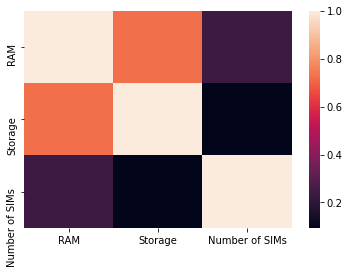

In [33]:
# heatmap

corr = smartphones_df.corr()
sns.heatmap(corr, annot=False)
plt.show()